In [1]:
import pandas as pd
import sqlite3

Подключение к БД

In [2]:
db = sqlite3.connect('../data/checking-logs.sqlite')

анализировать только пользователей, а не администраторов

анализировать только даты, когда были и просмотры, и подтверждения проверки

размер шрифта должен быть 8

размер фигуры (15,8)

В конце вашего Jupyter Notebook создайте ячейку markdown и вставьте вопрос: «Сколько раз количество просмотров превышало 150?» Вставьте: «Ответ: ___». Вставьте число в текст вместо подчеркивания.


In [3]:
query = """
SELECT *
FROM pageviews
WHERE uid LIKE 'user_%'
"""
pageview = pd.io.sql.read_sql(query, db, parse_dates=['datetime'])
pageview

,index,uid,datetime
0,12,user_30,2020-04-17 22:46:26.785035
1,14,user_14,2020-04-18 10:53:52.623447
2,15,user_17,2020-04-18 10:56:55.833899
3,16,user_14,2020-04-18 10:57:37.331258
4,18,user_17,2020-04-18 12:05:48.200144
...,...,...,...
982,1073,user_28,2020-05-21 18:45:20.441142
983,1074,user_19,2020-05-21 23:03:06.457819
984,1075,user_25,2020-05-21 23:23:49.995349
985,1078,user_5,2020-05-22 11:30:18.368990


In [4]:
pageview['datetime'] = pd.to_datetime(pageview['datetime'])
pageview['date'] = pageview['datetime'].dt.date
pageview = pageview.groupby('date').size().reset_index()
pageview.columns = ['date', 'view']
pageview

,date,view
0,2020-04-17,1
1,2020-04-18,23
2,2020-04-19,15
3,2020-04-21,3
4,2020-04-22,1
5,2020-04-23,5
6,2020-04-25,1
7,2020-04-26,8
8,2020-04-28,2
9,2020-04-29,4


In [5]:
query = """
SELECT *
FROM checker
WHERE uid LIKE 'user_%'
"""
checker = pd.io.sql.read_sql(query, db, parse_dates=['timestamp'])
checker

,index,status,success,timestamp,numTrials,labname,uid
0,7,ready,0,2020-04-17 05:19:02.744528,1,project1,user_4
1,8,checking,0,2020-04-17 05:22:35.249331,2,project1,user_4
2,9,ready,1,2020-04-17 05:22:45.549397,2,project1,user_4
3,10,checking,1,2020-04-17 05:34:14.691200,3,project1,user_4
4,11,ready,1,2020-04-17 05:34:24.422370,3,project1,user_4
...,...,...,...,...,...,...,...
3202,3397,ready,0,2020-05-21 20:19:06.872761,7,laba06s,user_1
3203,3398,checking,0,2020-05-21 20:22:41.785725,8,laba06s,user_1
3204,3399,ready,0,2020-05-21 20:22:41.877806,8,laba06s,user_1
3205,3400,checking,0,2020-05-21 20:37:00.129678,9,laba06s,user_1


In [6]:
checker['timestamp'] = pd.to_datetime(checker['timestamp'])
checker['date'] = checker['timestamp'].dt.date
checker = checker.groupby('date').size().reset_index()
checker.columns = ['date', 'commits']
checker

,date,commits
0,2020-04-17,23
1,2020-04-18,69
2,2020-04-19,33
3,2020-04-20,25
4,2020-04-21,25
5,2020-04-22,28
6,2020-04-23,43
7,2020-04-24,16
8,2020-04-25,104
9,2020-04-26,261


analyze only the dates when there were both views and checker commits

In [7]:
data = pd.merge(left=pageview, right=checker, on='date', how='inner')
data

,date,view,commits
0,2020-04-17,1,23
1,2020-04-18,23,69
2,2020-04-19,15,33
3,2020-04-21,3,25
4,2020-04-22,1,28
5,2020-04-23,5,43
6,2020-04-25,1,104
7,2020-04-26,8,261
8,2020-04-28,2,5
9,2020-04-29,4,17


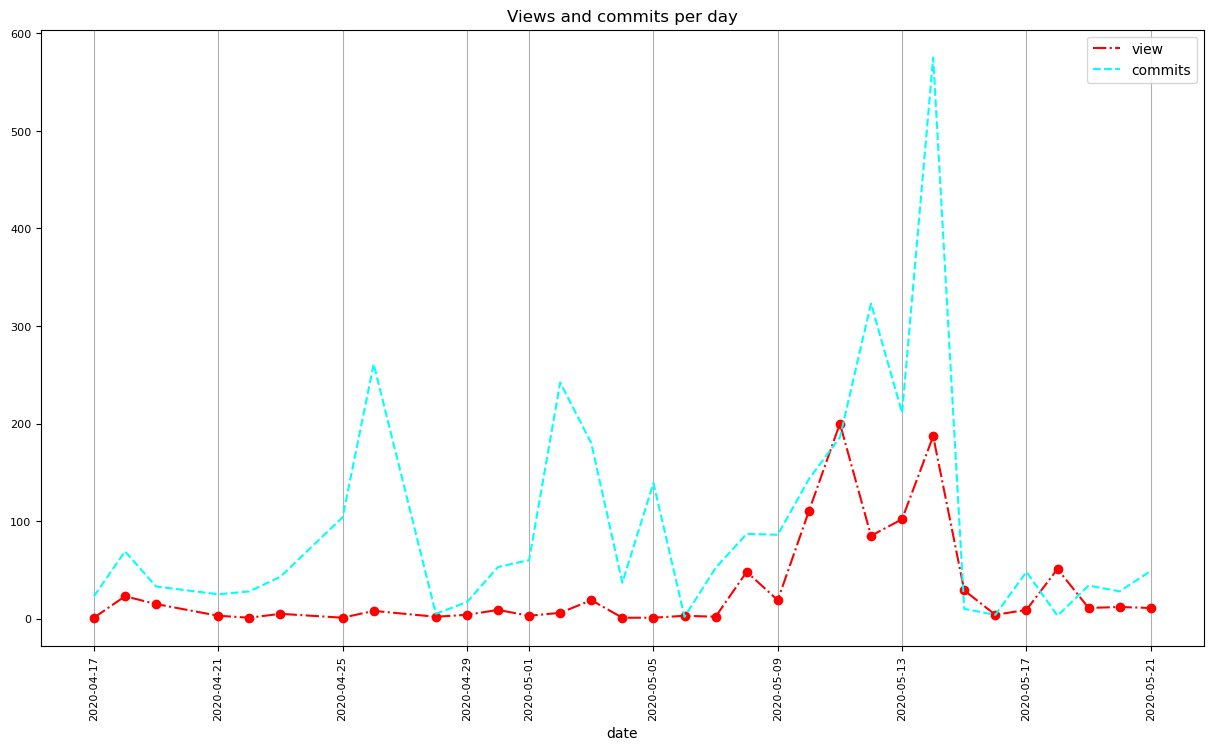

In [8]:
line_chart = data.plot( x ='date', y=['view', 'commits'],
                  fontsize=8,
                    figsize=(15, 8),
                    title='Views and commits per day',
                    rot=90,
                    style=['-.', '--'],
                    color=['red', 'cyan'])
line_chart.get_lines()[0].set_marker('o')
line_chart.grid(axis='x')

## «Сколько раз количество просмотров (views) превышало 150?»

Ответ: 2